In [3]:
######################################Importing All Necessary Libraries ###########################################
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from scipy.spatial.distance import hamming
from scipy.spatial.distance import euclidean
from surprise import KNNWithMeans
from surprise import Dataset, Reader
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate
from surprise import SVD
from surprise import NormalPredictor
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
######################################################Q1. Read the data (jokes.csv)

In [5]:
df_jokes = pd.read_csv('Dataset - jokes.csv')

In [6]:
#Copying to df - Just for the ease of using df
df = df_jokes

In [7]:
df.head(10)

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,100,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,47,99.00,99.00,99.00,99.00,8.59,-9.85,7.72,8.79,99.00,...,99.00,99.00,99.00,99.00,99.00,2.33,99.00,99.00,99.00,99.00
7,100,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,100,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,72,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,...,99.00,4.47,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


In [8]:
##########################Q2. Create new Dataframe ratings starting from column joke1 and consider first 200 rows only

In [9]:
df = df.drop('NumJokes', axis=1)[0:200]

In [10]:
df.shape

(200, 100)

In [ ]:
##########################################################Q3. Preprocess ratings

In [11]:
df.isnull().sum()

Joke1      0
Joke2      0
Joke3      0
Joke4      0
Joke5      0
          ..
Joke96     0
Joke97     0
Joke98     0
Joke99     0
Joke100    0
Length: 100, dtype: int64

In [12]:
df = df.replace(99.0, 0)

In [13]:
df

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,5.73,0.00,-0.58,1.75,2.86,7.23,2.04,-4.27,3.11,7.14,...,1.70,4.66,1.65,5.58,5.73,3.50,0.00,-2.04,2.91,1.84
196,1.80,5.39,8.06,-0.10,4.81,4.66,-7.09,-7.72,3.69,4.47,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
197,2.62,-3.79,-1.17,-0.44,-1.02,5.05,-3.69,2.18,3.30,-0.73,...,1.41,-2.52,-0.53,-1.89,1.17,-2.04,-1.17,-0.73,0.73,0.44
198,0.00,0.00,0.00,0.00,7.91,0.00,3.64,-1.89,0.00,0.00,...,2.96,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
################################################Q4. Find mean for each joke
################################################Q5. List most popular 10 jokes

In [14]:
#Finding Top 10 Jokes
#df.mean().sort_values(ascending=False)[0:10]
df.describe().transpose()['mean'].sort_values(ascending=False)[0:10]

Joke50    4.05540
Joke36    3.61150
Joke53    3.57150
Joke35    3.22315
Joke29    3.18995
Joke27    3.05240
Joke62    2.86185
Joke49    2.85000
Joke32    2.77955
Joke31    2.65710
Name: mean, dtype: float64

In [ ]:
#########################################################################################################################

In [ ]:
#PART2 - Collaborative Filtering Based Recommendation System

In [ ]:
######################################################################################################################

In [ ]:
#########################################Q1. Explore the Dataset

In [20]:
df_rates = pd.read_csv('Dataset - ratings.csv',sep=';', error_bad_lines=False, encoding='latin-1')
df_books = pd.read_csv('Dataset -books.csv',sep=';', error_bad_lines=False, encoding='latin-1')
df_users = pd.read_csv('Dataset- users.csv',sep=';', error_bad_lines=False, encoding='latin-1')

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.p

In [21]:
df_rates

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [22]:
df_books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [23]:
df_users

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [24]:
df_books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [25]:
#Keeping Only ISBN and Book-Title
df_books = df_books[['ISBN','Book-Title']]

In [26]:
df_books

,ISBN,Book-Title
0,0195153448,Classical Mythology
1,0002005018,Clara Callan
2,0060973129,Decision in Normandy
3,0374157065,Flu: The Story of the Great Influenza Pandemic...
4,0393045218,The Mummies of Urumchi
...,...,...
271355,0440400988,There's a Bat in Bunk Five
271356,0525447644,From One to One Hundred
271357,006008667X,Lily Dale : The True Story of the Town that Ta...
271358,0192126040,Republic (World's Classics)


In [27]:
df_books.shape

(271360, 2)

In [28]:
df_users.shape

(278858, 3)

In [29]:
df_rates.shape

(1149780, 3)

In [30]:
##############################################Q2. Data Preprocessing
##############################################Create new DataFrame 

In [31]:
df_book_ratings = pd.merge(df_books, df_rates, on='ISBN')

In [32]:
df_book_ratings.shape

(1031136, 4)

In [33]:
df_book_ratings

,ISBN,Book-Title,User-ID,Book-Rating
0,0195153448,Classical Mythology,2,0
1,0002005018,Clara Callan,8,5
2,0002005018,Clara Callan,11400,0
3,0002005018,Clara Callan,11676,8
4,0002005018,Clara Callan,41385,0
...,...,...,...,...
1031131,0440400988,There's a Bat in Bunk Five,276463,7
1031132,0525447644,From One to One Hundred,276579,4
1031133,006008667X,Lily Dale : The True Story of the Town that Ta...,276680,0
1031134,0192126040,Republic (World's Classics),276680,0


In [34]:
df_book_ratings = df_book_ratings.drop('Book-Title', axis=1)

In [35]:
df_book_ratings

,ISBN,User-ID,Book-Rating
0,0195153448,2,0
1,0002005018,8,5
2,0002005018,11400,0
3,0002005018,11676,8
4,0002005018,41385,0
...,...,...,...
1031131,0440400988,276463,7
1031132,0525447644,276579,4
1031133,006008667X,276680,0
1031134,0192126040,276680,0


In [36]:
#Just for simplicity to use df :)
df = df_book_ratings

In [ ]:
#########################################################Q3. Data Preprocessing
################################In new Dataframe, drop rows with 0 bookRating, since 0 is mentioned as 'Implicit Rating'.


In [37]:
#Dropping Zero Rating
df = df.loc[df['Book-Rating'] != 0,:]

In [38]:
df.shape

(383842, 3)

In [40]:
######################################################Q4. Check rating's distribution¶

<AxesSubplot:xlabel='Book-Rating', ylabel='count'>

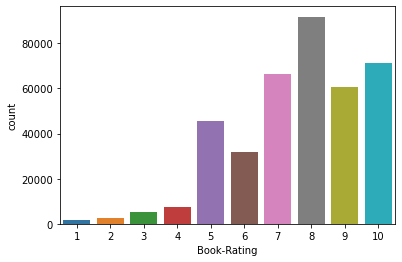

In [41]:
#Visualizing Book-Rating
sns.countplot(x='Book-Rating', data=df)

<AxesSubplot:ylabel='Density'>

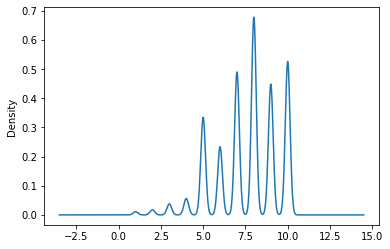

In [43]:
df['Book-Rating'].plot(kind='kde')

In [44]:
df.head(10)

,ISBN,User-ID,Book-Rating
1,0002005018,8,5
3,0002005018,11676,8
5,0002005018,67544,8
8,0002005018,116866,9
9,0002005018,123629,9
11,0002005018,200273,8
12,0002005018,210926,9
13,0002005018,219008,7
14,0002005018,263325,6
16,0060973129,2954,8


In [45]:
df['User-ID'].value_counts()>=100

11676      True
98391      True
189835     True
153662     True
23902      True
          ...  
148684    False
124088    False
105655    False
103606    False
211175    False
Name: User-ID, Length: 68091, dtype: bool

In [ ]:
######################################Q5. Build a User-Based Collaborative Filtering model

In [46]:
#Filter out all the Users who rated atleast 100 movies
df = df.groupby('User-ID').filter(lambda x: len(x) >= 100)

In [51]:
df.shape

(103271, 3)

In [49]:
#Swapping Column so that User-Id is first  -- This is to meet  Surprise library expectations
df = df[['User-ID', 'ISBN', 'Book-Rating']]

In [52]:
df.head(10)

,User-ID,ISBN,Book-Rating
3,11676,0002005018,8
21,110912,0374157065,10
26,197659,0374157065,9
31,11676,0399135782,9
34,46398,0399135782,9
54,230522,0399135782,7
58,245827,0399135782,9
64,52614,0425176428,8
69,11676,0671870432,8
108,7346,0440234743,9


In [53]:
#Just for concept Generating the Matrix
matrix = pd.pivot_table(df, values='Book-Rating', index=['User-ID'], columns=['ISBN'])

In [54]:
matrix

ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,...,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
User-ID,,,,,,,,,,,,,,,,,,,,,
2033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
274301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
275970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
################################Q5 Using Userbased Collaborative Filtering Model- Continuation
reader = Reader(rating_scale=(1, 10))

In [56]:
reader

In [57]:
#Loading the DataFrame
df_surprise = Dataset.load_from_df(df, reader)

In [58]:
df_surprise

In [59]:
#Checking Dataframe
df_surprise.df.head(10)

,User-ID,ISBN,Book-Rating
3,11676,0002005018,8
21,110912,0374157065,10
26,197659,0374157065,9
31,11676,0399135782,9
34,46398,0399135782,9
54,230522,0399135782,7
58,245827,0399135782,9
64,52614,0425176428,8
69,11676,0671870432,8
108,7346,0440234743,9


In [62]:
##############################################Q6. Apply SVD for user based filtering
#Split the data into train and test
#Train model on SVD
#Test Accuracy of the model

In [63]:
trainset, testset = train_test_split(df_surprise, test_size=.15)

In [64]:
algo = SVD()

In [65]:
algo.fit(trainset)

In [66]:
predictions = algo.test(testset)

In [67]:
accuracy.rmse(predictions)

RMSE: 1.4810


1.48102582433404

In [68]:
predictions

[Prediction(uid=78834, iid='0743211375', r_ui=10.0, est=8.857652726385632, details={'was_impossible': False}),
 Prediction(uid=95359, iid='0449702383', r_ui=5.0, est=7.73168492953596, details={'was_impossible': False}),
 Prediction(uid=76626, iid='0316291161', r_ui=8.0, est=8.320441017722837, details={'was_impossible': False}),
 Prediction(uid=201290, iid='0439139597', r_ui=9.0, est=7.880590820417471, details={'was_impossible': False}),
 Prediction(uid=172742, iid='0553572997', r_ui=10.0, est=8.764177586840056, details={'was_impossible': False}),
 Prediction(uid=273113, iid='0671870998', r_ui=5.0, est=5.142004213827196, details={'was_impossible': False}),
 Prediction(uid=79441, iid='0517526751', r_ui=8.0, est=7.67948411313964, details={'was_impossible': False}),
 Prediction(uid=11676, iid='0316845434', r_ui=5.0, est=7.386614243414541, details={'was_impossible': False}),
 Prediction(uid=55492, iid='0064407667', r_ui=10.0, est=7.505570673886908, details={'was_impossible': False}),
 Predi

In [ ]:
#Just Casually Printed the first n_recomendations as they appear ......(not top ones ..its not sorted)

In [70]:
def recomend(uid,n_recommend):
    for i in range(len(predictions)):
        if uid in predictions[i]:
            n_recommend = n_recommend - 1
            if n_recommend == 0:
                break
            print(predictions[i])
    

In [71]:
recomend(43910, 20)

user: 43910      item: 0393956369 r_ui = 10.00   est = 8.24   {'was_impossible': False}
user: 43910      item: 0060926848 r_ui = 5.00   est = 7.88   {'was_impossible': False}
user: 43910      item: 0743247612 r_ui = 7.00   est = 7.62   {'was_impossible': False}
user: 43910      item: 1573225487 r_ui = 9.00   est = 8.05   {'was_impossible': False}
user: 43910      item: 0385498802 r_ui = 7.00   est = 8.18   {'was_impossible': False}
user: 43910      item: 0679746048 r_ui = 7.00   est = 8.06   {'was_impossible': False}
user: 43910      item: 0060523166 r_ui = 8.00   est = 8.00   {'was_impossible': False}
user: 43910      item: 0684809133 r_ui = 6.00   est = 8.16   {'was_impossible': False}
user: 43910      item: 0399148027 r_ui = 8.00   est = 7.80   {'was_impossible': False}
user: 43910      item: 074325550X r_ui = 7.00   est = 8.00   {'was_impossible': False}
user: 43910      item: 0062509594 r_ui = 10.00   est = 8.27   {'was_impossible': False}
user: 43910      item: 0743469844 r_ui = 

In [72]:
#############################Q7. Create a function to generate n recommendations for user x. (n, x should be parameterized)

In [73]:
#Implementing Function by converting the list to Dataframe :)...(Here its easy to sort)

In [74]:
prediction = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
def recommendation(userID, num): 
    user_rec = prediction[prediction['uid']==userID].sort_values(by = 'est', ascending=False).head(num)
    return user_rec


In [76]:
#Here are the top 10 book Recomendations for the User - 98391
recommendation(98391, 10)

,uid,iid,rui,est,details
12176,98391,0553581643,9.0,9.633026,{'was_impossible': False}
7992,98391,0553110845,8.0,9.582682,{'was_impossible': False}
7831,98391,1551667223,10.0,9.492005,{'was_impossible': False}
587,98391,0060519711,10.0,9.464612,{'was_impossible': False}
13759,98391,0553801430,8.0,9.460136,{'was_impossible': False}
7174,98391,0553801945,10.0,9.433890,{'was_impossible': False}
10893,98391,0345437055,8.0,9.406779,{'was_impossible': False}
11342,98391,051513287X,9.0,9.400382,{'was_impossible': False}
1958,98391,0373790627,8.0,9.400154,{'was_impossible': False}
8280,98391,0743454502,9.0,9.342828,{'was_impossible': False}


In [ ]:
#Casually Using algo.predict - to See How it Works

In [77]:
testset

[(78834, '0743211375', 10.0),
 (95359, '0449702383', 5.0),
 (76626, '0316291161', 8.0),
 (201290, '0439139597', 9.0),
 (172742, '0553572997', 10.0),
 (273113, '0671870998', 5.0),
 (79441, '0517526751', 8.0),
 (11676, '0316845434', 5.0),
 (55492, '0064407667', 10.0),
 (153662, '0380795116', 9.0),
 (200226, '0312971842', 6.0),
 (235105, '0802138616', 6.0),
 (153662, '0804119902', 9.0),
 (174892, '038097780X', 5.0),
 (69078, '0275941140', 8.0),
 (16634, '0345255887', 8.0),
 (181176, '0292760167', 7.0),
 (158433, '0515104175', 10.0),
 (93047, '0517701871', 7.0),
 (156269, '0425146227', 7.0),
 (19085, '0451400690', 8.0),
 (222204, '0345247787', 9.0),
 (235105, '1569473250', 8.0),
 (227520, '0553565214', 7.0),
 (31826, '0425128164', 10.0),
 (2276, '0758201931', 10.0),
 (185384, '0736909117', 10.0),
 (12824, '1931514178', 10.0),
 (56271, '0330331612', 7.0),
 (6543, '0618219153', 8.0),
 (75591, '0375702695', 9.0),
 (193898, '0399150870', 8.0),
 (35433, '3453213998', 9.0),
 (31826, '1562823779'

In [78]:
algo.predict(76626,'0553275976', 7.0)

Prediction(uid=76626, iid='0553275976', r_ui=7.0, est=9.036284762839916, details={'was_impossible': False})